## **COURSE PROJECT I**
---
### **TEAM ID**: 02      
### **DATASET**: Diamond
---


---


## **Kaagle's Largest Diamond Dataset**

### Here is a concise overview of the columns:


* **`cut`** refers to one of the 10 or so most common diamond cuts.
* **`color`** Clear diamonds are graded D-Z. The higher letters more yellowish but are often better values since color is hard to determine once in a ring.
* **`clarity`** refers the inclusions (i.e., internal flaws) in the diamonds seen though a jewelers loupe or microscope. Fewer and smaller are better.
* **`carat_weight`** Refers to the mass of the diamond. It's loosely connected with dimension of a diamond but cut and cut_quality tends to play an equally large if not larger role.
* **`cut_quality`** refers the GIA Cut Grading System which was developed in 2005 and is de facto standard.
* **`lab`** is the grading lab. The big three are GIA, IGI and HRD. Each diamond gets a lab certificate that looks like this.
* **`eye-clean`** refers to the blemishes or inclusions can see with a the naked eye. There are 10 grades.
* **`culet_size`** is the size of the circle you'd see if you looked straight down. None is ideal because it affects the amount of light that gets reflected.
* **`culet_condition`** indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot.
* **`fancy_color`** columns  have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab grown.
* **`fluor`** columns refer to the effect of long wave UV light. According to GIA 25-35% have it; for ~10% of those it's noticeable to an expert.
* **`depth_percentandtable_percent`** are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut.
* **`meas_length`**, meas_width, meas_depth are the absolute measurements of stone.
* **`girdle min/max`** are where the id of a stone is engraved they also are where the meets the setting and play a role in reflection. There are 9 values ranging from extremely thin to extremely thick
* **`fancy`** columns refer to colored diamonds. They can be natural like the extremely rare blue diamonds, or lab grown. The columns refer to the colors, secondary colors and their intensity.
* **`total_sales_price`** is priced in dollars.



### **EDA**

In [1]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DAIICT-Data-Mining/diamonds.csv')

drop_col = 'Unnamed: 0'
df.drop(drop_col, axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


* **Here is brief note about our diamond dataset:**

In [3]:
df.shape

(219703, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 



---


---


* **Check for the null values inside the features**



In [5]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

* **Although there are no null values within the feature, our dataset contains entries marked as 'unknown.'**
* **Thus, we need to address these 'unknown' values in our dataset and handle those unknown marked values.**

---

---


* **Below is a summary of key statistics for each numerical features**

In [6]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06





---



---


* **Below is a summary of key statistics for each categorial features**

In [7]:
df.describe(include='O').T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384





---



---

* **Now, let's examine the presence of 'unknown' values in each feature and display the count of 'unknown' occurrences in each one.**

In [8]:
def count_for_unknown_values(columns):
    unknown_counts = []
    for col in columns:
        counts = (df[col] == 'unknown').sum()
        unknown_counts.append([col, counts])

    # Use tabulate to format and print the table
    table = tabulate(unknown_counts, headers=['Feature', 'Unknown Count'], tablefmt='pretty')
    print(table)

print('No of Rows:', df.shape[0])
count_for_unknown_values(df.columns)

No of Rows: 219703
+-----------------------------+---------------+
|           Feature           | Unknown Count |
+-----------------------------+---------------+
|             cut             |       0       |
|            color            |     9162      |
|           clarity           |       0       |
|        carat_weight         |       0       |
|         cut_quality         |     60607     |
|             lab             |       0       |
|          symmetry           |       0       |
|           polish            |       0       |
|          eye_clean          |    156916     |
|         culet_size          |     85740     |
|       culet_condition       |    204384     |
|        depth_percent        |       0       |
|        table_percent        |       0       |
|         meas_length         |       0       |
|         meas_width          |       0       |
|         meas_depth          |       0       |
|         girdle_min          |     83432     |
|         girdle_max 

---
---

### **Handling the 'Unknown' marked values**

* **We perform the task of identifying 'unknown' values on a copied dataset rather than the original data.**


In [9]:
temp_df = df.copy()

**1. handling unknown values in color feature**

> We will substitute the 'unknown' values with the mode value found in the 'color' feature.

> **Reason:** *We have selected the mode as our choice for imputation because 'color' is an independent feature in the dataset, meaning its value cannot be deduced from the values of other features.*

In [10]:
# Feature 'color'

mode_for_feature_color = temp_df['color'].mode()[0]
temp_df['color'].replace('unknown', mode_for_feature_color, inplace=True)
print('No. of unknown values in `color` feature:', (temp_df['color'] == 'unknown').sum()) # check for null or unknown value

No. of unknown values in `color` feature: 0


**2. handling unknown in cut_quality feature**

> We will replace the 'unknown' values by utilizing information from various other features such as 'symmetry,' 'polish,' and 'clarity.

> **Reason:** *The evaluation of 'cut_quality' is based on factors such as symmetry, polish, and clarity, following the guidelines of the GIA*

In [11]:
# Feature 'cut_quality'

diamonds = temp_df
diamonds['cut_quality'] = diamonds['cut_quality'].replace('unknown', pd.NA)

# Calculate the overall mode value of 'cut_quality' for non-null values
overall_mode_for_cut_quality = diamonds['cut_quality'].dropna().mode().iloc[0]

# Filter out rows with null 'cut_quality' values
filtered_diamonds = diamonds.dropna(subset=['cut_quality'])

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = filtered_diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Convert NumPy arrays to tuples for use as dictionary keys
unique_combinations['key'] = list(zip(unique_combinations['symmetry'],
                                      unique_combinations['polish'],
                                      unique_combinations['clarity'],))

combination_to_cut_quality = dict(zip(unique_combinations['key'], unique_combinations['cut_quality']))

# Define a function to fill missing 'cut_quality' values
def fill_missing_cut_quality(row):
    if pd.isna(row['cut_quality']):
        key = (row['symmetry'], row['polish'], row['clarity'])
        if key in combination_to_cut_quality:
            if pd.notna(combination_to_cut_quality.get(key)):
                return combination_to_cut_quality[key]
        return overall_mode_for_cut_quality
    return row['cut_quality']

# Apply the function to fill missing 'cut_quality' values
diamonds['cut_quality'] = diamonds.apply(fill_missing_cut_quality, axis=1)
diamonds['cut_quality'] = diamonds['cut_quality'].replace(pd.NA, 'unknown')
temp_df = diamonds

**3. handling unknown in culet_size**
> We will substitute the 'unknown' values with the mode value found in the 'culet_size' feature.

> **Reason:** *We have selected the mode as our choice for imputation because 'culet_size' is an independent feature in the dataset, meaning its value cannot be deduced from the values of other features.*

In [12]:
# Feature 'culet_size'

mode_for_feature_culet_size = temp_df['culet_size'].mode()[0]
temp_df['culet_size'].replace('unknown', mode_for_feature_culet_size, inplace=True)
print('Unknown in `culet_size` feature:', (temp_df['culet_size'] == 'unknown').sum()) # check for null or unknown value

Unknown in `culet_size` feature: 0


**4. handling unknown in griddle_min/griddle_max**
> We will substitute the 'unknown' values with the mode value found in the 'griddle_min/griddle_max' feature.

> **Reason:** *Since this feature can only be derived from physical attributes such as measurements, proportions, and detailed gemological analysis, we will opt for the mode value of the feature to populate null or unknown values.*

In [13]:
# Feature 'griddle_min/max'

gridle_min_without_unknown = temp_df[temp_df['girdle_min'] != 'unknown']
gridle_max_without_unknown = temp_df[temp_df['girdle_max'] != 'unknown']

mode_for_feature_girdle_min = gridle_min_without_unknown['girdle_min'].mode()[0]
mode_for_feature_girdle_max = gridle_max_without_unknown['girdle_max'].mode()[0]

temp_df['girdle_min'].replace('unknown', mode_for_feature_girdle_min, inplace=True)
temp_df['girdle_max'].replace('unknown', mode_for_feature_girdle_max, inplace=True)

print("Unknown in Girdle Min", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_min
print("Unknown in Girdle Max", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_max


Unknown in Girdle Min 0
Unknown in Girdle Max 0


**5. handling unknown in the features like eye_clean, culet_condition, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity.**

> Just Remove the above feature from the dataset.

> **Reason:**
> *We are removing the following features due to the presence of null values in more than half of the total entities. Furthermore, there are features below that are dependent on the removed features, so we must also remove those.*

In [14]:
temp_df = temp_df.drop(columns=['eye_clean',
                      'culet_condition',
                      'fluor_color',
                      'fluor_intensity',
                      'fancy_color_dominant_color',
                      'fancy_color_secondary_color',
                      'fancy_color_overtone',
                      'fancy_color_intensity'])
temp_df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,E,VS2,5.17,Excellent,GIA,Very Good,Very Good,N,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,E,SI2,0.90,Fair,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


**So now we have successfully eliminated the 'unknown' values from the feature.**



---



---


### **Visualization**

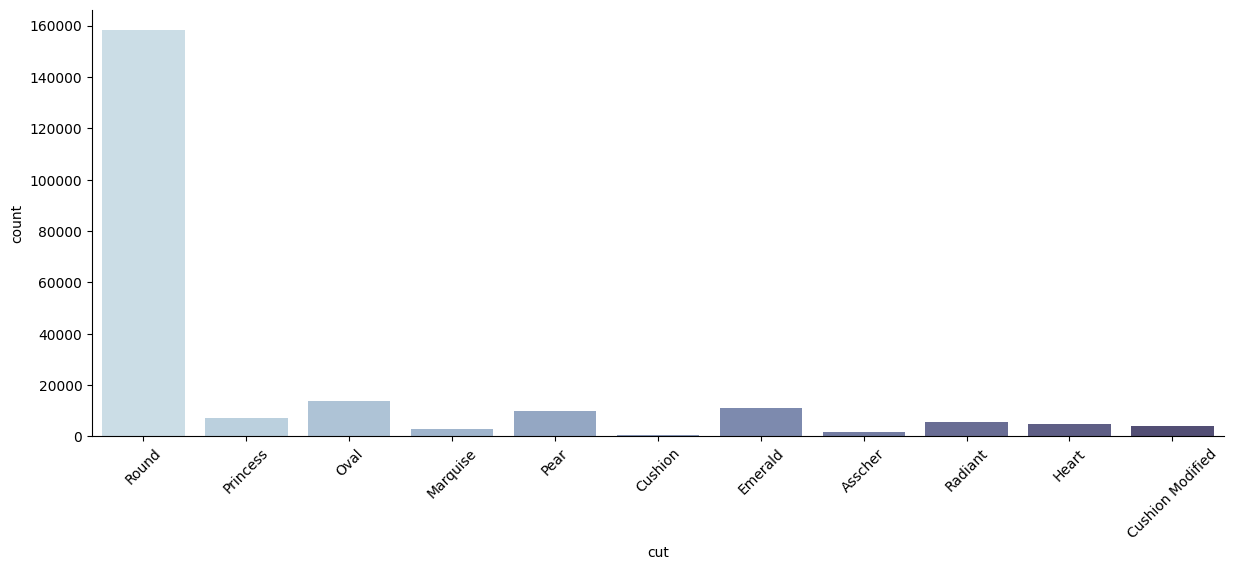

In [31]:
import seaborn as sns

# Assuming 'diamond_shape' is the correct column name for diamond shapes in your DataFrame
shapes = ['Round', 'Princess', 'Oval', 'Marquise', 'Pear', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Heart', 'Cushion Modified']

sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
sns.catplot(x='cut', data=df, kind='count', order=shapes, aspect=2.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* **In above plot it's safe to say that it's hardly surprising that round diamonds constitute the overwhelming majority.**

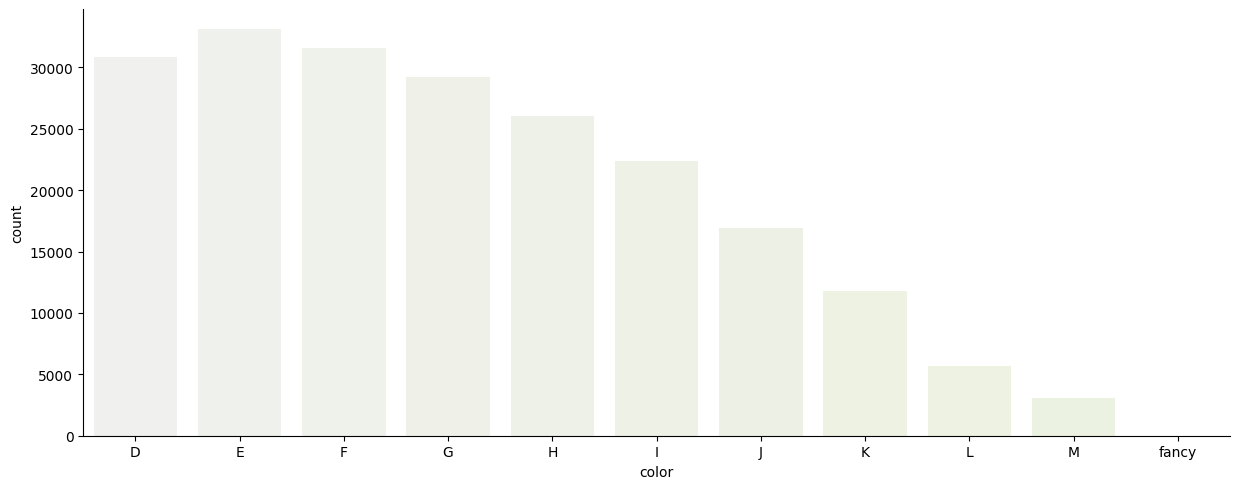

In [32]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.5)

* **Above plot is to identify the categorial count for the color feature using visualization.**

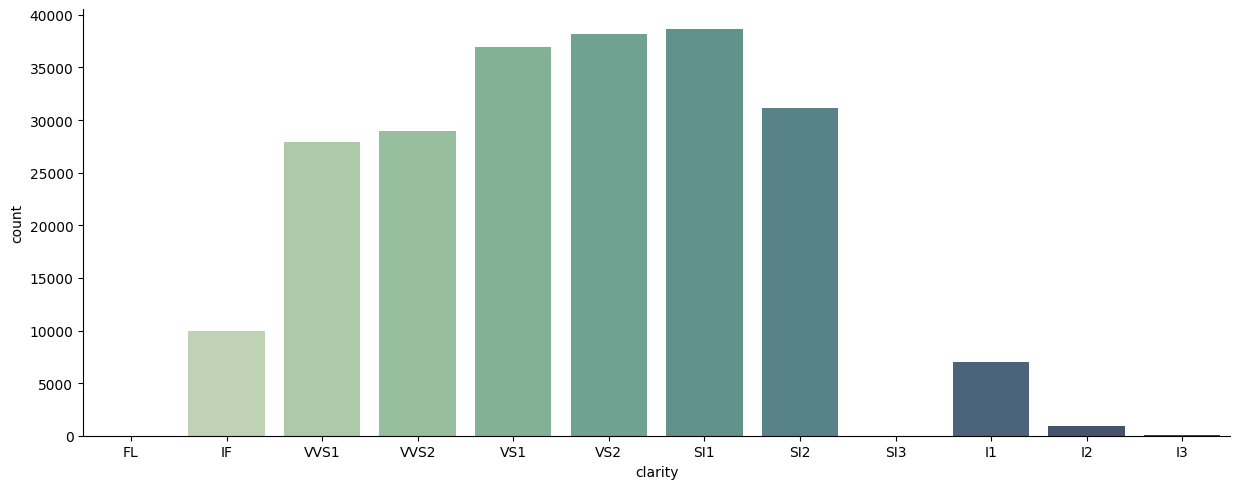

In [33]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.5)


* **There are a total of 10 SI3 stones and zero Flawless stones in this dataset**

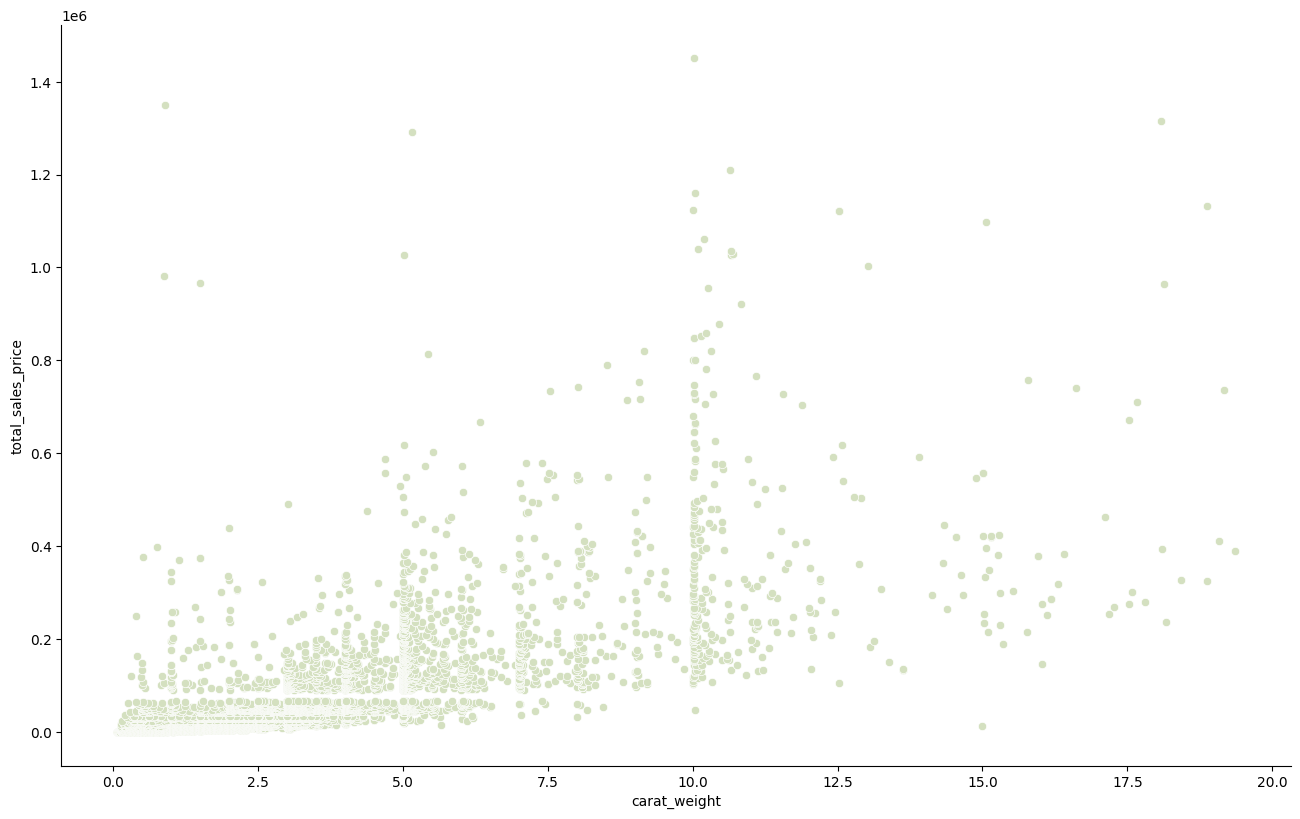

In [34]:
cw = sns.relplot( data=df, x="carat_weight", y="total_sales_price")
cw.figure.set_size_inches(15, 9)

* **Above is the visualization of the relationship between the carat weight of diamonds (x-axis) and their total sales price (y-axis)**



---



---


### **Feature Engineering**

In [15]:
# Categorical Features
categorical_columns = [feature for feature in temp_df.columns if temp_df[feature].dtypes == 'O']

# Numerical Features
numerical_columns = [feature for feature in temp_df.columns if temp_df[feature].dtypes != 'O']

# Create a table for categorical columns
categorical_table = tabulate({"Categorical Features": categorical_columns}, headers="keys", tablefmt="pretty")

# Create a table for numerical columns
numerical_table = tabulate({"Numerical Features": numerical_columns}, headers="keys", tablefmt="pretty")

# Print the tables
print("Categorical Features:")
print(categorical_table)

print("\nNumerical Features:")
print(numerical_table)

Categorical Features:
+----------------------+
| Categorical Features |
+----------------------+
|         cut          |
|        color         |
|       clarity        |
|     cut_quality      |
|         lab          |
|       symmetry       |
|        polish        |
|      culet_size      |
|      girdle_min      |
|      girdle_max      |
+----------------------+

Numerical Features:
+--------------------+
| Numerical Features |
+--------------------+
|    carat_weight    |
|   depth_percent    |
|   table_percent    |
|    meas_length     |
|     meas_width     |
|     meas_depth     |
| total_sales_price  |
+--------------------+


* **First, we need to encode the categorical features. To do this, we'll categorize the features into two groups: ordinal features and nominal features. We will then apply encoding techniques specific to each feature type.**

In [16]:
# Define the features
ordinal_features = [feature for feature in temp_df.columns if temp_df[feature].dtypes == 'O' and feature not in ['cut', 'lab']]
nominal_features = ['cut', 'lab']

# Create tables
ordinal_table = tabulate({"Ordinal Features": ordinal_features}, headers="keys", tablefmt="pretty")
nominal_table = tabulate({"Nominal Features": nominal_features}, headers="keys", tablefmt="pretty")

# Print the tables
print("Ordinal Features:")
print(ordinal_table)

print("\nNominal Features:")
print(nominal_table)

Ordinal Features:
+------------------+
| Ordinal Features |
+------------------+
|      color       |
|     clarity      |
|   cut_quality    |
|     symmetry     |
|      polish      |
|    culet_size    |
|    girdle_min    |
|    girdle_max    |
+------------------+

Nominal Features:
+------------------+
| Nominal Features |
+------------------+
|       cut        |
|       lab        |
+------------------+


* **If there is Nominal features then we will use one-hot encoding because it's a suitable technique for representing categorical data where there is no inherent order or ranking among the categories and it ensure that the categorical data is properly represented without making any assumptions about the relationships between categories**

In [17]:
temp_df = pd.get_dummies(temp_df, columns=nominal_features, prefix=["cut", "lab"])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,E,VVS2,0.09,Very Good,Very Good,Very Good,N,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,E,VVS2,0.09,Excellent,Very Good,Very Good,N,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,E,VVS2,0.09,Very Good,Very Good,Excellent,N,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


* **If there is ordinal features then we will make use of label encoding because it assigns numerical labels to the categories in a way that respects their inherent order.**

In [18]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the selected features and apply label encoding
for feature in ordinal_features:
    temp_df[feature] = label_encoder.fit_transform(temp_df[feature])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,1,10,0.09,0,4,4,3,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,1,10,0.09,4,4,4,3,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,1,10,0.09,0,4,4,3,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,1,10,0.09,0,4,4,3,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,1,10,0.09,4,4,0,3,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


* **So now we have converted all the categorial features into the numerical features.**

* **There are 29 features list below.**

In [19]:
temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
color,219703.0,3.029481,2.323084,0.00,1.00,3.00,5.00,9.00
clarity,219703.0,6.581430,2.507201,0.00,4.00,7.00,9.00,10.00
carat_weight,219703.0,0.755176,0.845894,0.08,0.31,0.50,1.00,19.35
cut_quality,219703.0,1.052835,1.631561,0.00,0.00,0.00,2.00,4.00
symmetry,219703.0,1.557266,1.927578,0.00,0.00,0.00,4.00,4.00
polish,219703.0,0.784855,1.579499,0.00,0.00,0.00,0.00,4.00
culet_size,219703.0,3.025512,0.319135,0.00,3.00,3.00,3.00,7.00
depth_percent,219703.0,61.683768,9.915266,0.00,61.20,62.40,63.50,98.70
table_percent,219703.0,57.747585,9.959928,0.00,57.00,58.00,60.00,94.00
meas_length,219703.0,5.548853,1.763924,0.00,4.35,5.06,6.35,93.66


* **Below we have divided the independent and dependent features.**

* **The next step in feature engineering involves standardizing or scaling the independent features.**

In [20]:
# Independent Features represented as X
X = temp_df.drop(columns=['total_sales_price'])

# Dependent Feature represented as y
y = df['total_sales_price'].values.reshape(-1, 1) # total_sales_price

* **We will make use of RobustScaler Class for the scaling because it is robust to outliers, meaning it is less influenced by extreme values in the dataset.**

* **In below code we have done the scaling after spliting the data into the train and test set. It's actually doesn't make any difference if we do it before.**

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = RobustScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



---



---

### **Modeling**

Below is the 2 different models we will use to predict dependent feature y.

1. Ridge
2. lasso

Firstly we have splitted the feature into 2 part training and testing part with proportion of 8:2, it means 80% training data and 20% testing data.

Then we have use GridSearchCV(Grid Search Cross-Validation) is a technique in machine learning used for hyperparameter tuning and model selection. so, inorder to get the best combination of hyperparameters for a machine learning model by evaluating the model's performance on different combinations of hyperparameters.

We have apply the above GSCV technique for the above two different model lasso, ridge.

Then we have evaluated the model using some evaluation methods such as MAE, RMSE and R_square.



In [22]:
from sklearn.linear_model import Ridge

# Choose the degree for polynomial features
degree = 2  # You can increase this to the desired degree

# Create and fit the Polynomial Regression model
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_normalized)
X_test_poly = poly.transform(X_test_normalized)

# Define hyperparameters for Ridge Regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

# Create Ridge Regression model
ridge = Ridge()

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Use the best model obtained from GridSearchCV
best_ridge = grid_search.best_estimator_

# Make predictions
y_pred = best_ridge.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error (MSE): 223319332.7894
Root Mean Squared Error (RMSE): 14943.8728
Mean Absolute Error (MAE): 2884.1600
R-squared (R2): 0.7125
Best Alpha: 100.0


In [23]:
# Choose the degree for polynomial features
degree = 2  # You can increase this to the desired degree

# Create and fit the Polynomial Regression model
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_normalized)
X_test_poly = poly.transform(X_test_normalized)

# Define hyperparameters for Lasso Regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

# Create Lasso Regression model
lasso = Lasso()

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Use the best model obtained from GridSearchCV
best_lasso = grid_search.best_estimator_

# Make predictions
y_pred = best_lasso.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Best Alpha: {best_alpha}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.666e+12, tolerance: 8.709e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+13, tolerance: 9.240e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+13, tolerance: 9.321e

Mean Squared Error (MSE): 229971869.1338
Root Mean Squared Error (RMSE): 15164.8234
Mean Absolute Error (MAE): 2914.0377
R-squared (R2): 0.7039
Best Alpha: 100.0
